<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
!pip install mahotas

In [38]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020


In [39]:
import mahotas.features.texture as mht
import mahotas.features

In [40]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020

from Get_PSDArea import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.18 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020


In [41]:
!ls

Areas_ImageJ.csv		 IMAGEJ_Zuados.zip
Areas_ImageJ.xlsx		 PSD_GRAIN_NOT_GRAIN_nov_13_2020.ipynb
GetBetterSegm.py		 PSD_GRAIN_NOT_GRAIN_out_09_2020.ipynb
Get_PSDArea.py			 PSD_GRAIN_NOT_GRAIN_out_19_2020.ipynb
histogram_fev_2021.py		 PSD_GRAIN_NOT_GRAIN_out_28_2020.ipynb
Histogram_PSD_out_19_2020.ipynb  PSD_USA_ROTINAS_out_05_2020.ipynb
Histogram_PSD_out_23_2020.ipynb  README.md
imageJ_jpg.zip			 Teste


In [42]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 42.60 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado


In [43]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [44]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 41.27 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [45]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 111 (delta 60), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (111/111), 361.53 KiB | 7.09 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_paper_fev_2021


In [46]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [47]:
!ls

ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
ANN_FIND_GRAIN.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
Graphic_Epochs_fev_09_2020.ipynb
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md


In [48]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 41.18 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_paper_fev_2021/Doutorado


In [49]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [50]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 41.73 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado


In [51]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [52]:
df=Segmenta(img)

In [53]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 17.7897 - accuracy: 0.3651
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 1.7005 - accuracy: 0.5009
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 5.1243 - accuracy: 0.4853
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.8669 - accuracy: 0.5199
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 4.5957 - accuracy: 0.4955
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 4.6349 - accuracy: 0.4916
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 4.1904 - accuracy: 0.4959
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 3.5982 - accuracy: 0.5120
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 3.3117 - accuracy: 0.4864
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 2.6190 - accuracy: 0.5015
Epoch 11

In [54]:
# print(y_pred.ravel())

In [55]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [56]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [57]:
df.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,109,73.903709,81.662819,85.912048,90.922394,94.908844,100.605339,112.030708,110.889565,94.413101,36.851612,37.598434,46.560478,41.500290,40.355274,42.645905,46.843365,44.398113,44.882080,50.315125,58.980892,72.651039,76.243835,76.877281,80.164719,94.046799,91.604408,89.568550,91.006317,83.493637,87.509964,94.049408,93.897232,101.230362,102.845047,108.880646,111.823326,100.526382,45.969364,37.911034,...,3.000000,3.000000,3.073058,3.146116,3.073057,3.000000,3.017928,3.076340,3.080128,2.949667,3.026766,3.124906,3.190893,3.697584,3.424123,3.256965,3.444491,3.488764,3.447774,3.000000,3.256881,3.256881,3.609292,3.455601,3.396263,3.000000,3.000000,3.150829,3.179110,2.990573,2.875095,3.433634,3.381786,3.256881,3.573605,3.411498,3.381786,3.196448,3.230115,3.461914
1,181,77.604202,101.409821,124.097923,133.153275,133.677658,136.779648,139.396118,142.733627,145.097076,148.737625,149.548599,163.068680,176.129272,101.261108,107.422546,105.602638,111.924667,119.056076,119.153450,124.605667,125.227043,124.384628,125.242516,124.012886,117.665268,111.047592,112.379105,109.543488,95.891548,124.908241,125.742935,128.856567,129.124878,132.691574,136.042252,136.451263,143.073029,151.904022,158.542572,...,113.036957,117.356300,91.846039,41.227741,51.146244,57.846039,57.135342,52.462284,49.542351,48.305332,48.325386,46.248772,64.220512,64.386192,73.707947,84.193710,88.657791,92.675255,97.478104,100.032730,101.962265,115.713631,117.915459,119.989136,106.594238,105.980225,107.166359,114.695740,117.336472,115.954765,102.685211,58.158791,50.457985,56.787586,56.013523,52.379993,47.873665,47.831970,48.811337,46.684658
2,117,23.247717,24.992477,18.388926,41.907372,61.475929,67.428741,67.177223,66.640884,67.911819,68.619408,65.336037,61.940460,61.059830,58.905689,57.109432,58.117104,60.021332,61.784645,61.564465,60.578423,62.611294,65.248886,63.530865,57.056030,53.417561,51.670177,54.031120,50.867268,22.816132,21.905035,18.322304,37.549129,57.073563,64.159836,66.487175,65.393311,61.806633,68.140335,67.064873,...,2.000000,2.000000,1.991964,1.914530,1.699759,1.339762,1.097450,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.155453,2.130908,2.000000,2.000000,2.000000,2.000000,2.159544,2.126817,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.495727,1.000000,1.000000,1.000000,1.000000,1.000000
3,172,77.722549,116.150352,119.931335,120.849655,109.817207,95.088699,89.208771,95.209305,104.654945,111.622498,123.172531,120.203903,101.215805,128.057343,139.049759,119.110336,101.419693,122.972961,133.882660,142.769073,143.341278,142.654953,125.527863,129.380219,143.070862,166.042206,196.758255,224.693893,65.259064,102.246620,114.551117,119.643593,110.392097,95.283943,93.657112,98.109787,110.447815,115.802063,116.200119,...,76.313683,70.300163,94.806389,100.608986,96.713898,95.798820,91.905365,63.853977,64.907516,74.424019,109.799889,123.775574,71.451591,39.266090,83.294754,108.360741,109.535973,98.303955,90.242294,87.864250,92.872368,97.767433,96.834511,94.286102,93.365074,98.621971,113.035164,103.898331,89.197403,106.076263,111.579773,102.897781,99.657120,98.839920,98.776642,87.660904,67.967010,62.190376,77.303413,112.805305
4,133,78.448753,83.966759,88.157890,89.393356,92.393349,89.412743,83.479233,80.044327,81.368423,84.083107,84.019394,78.108032,60.254845,48.670361,45.916893,43.684212,41.606651,41.279778,41.590027,41.650967,43.174515,45.612186,48.157894,47.554016,46.221607,46.060940,43.008308,42.947372,81.152359,86.060944,88.252075,91.083099,96.382271,95.229919,87.573410,82.786697,81.429367,84.686981,85.265930,...,59.495846,61.789474,61.268700,57.058170,46.252079,23.664820,12.121884,11.379501,82.609421,105.778397,

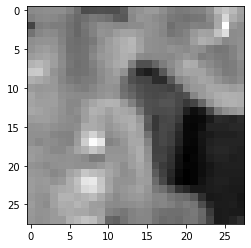

In [58]:
Size=28
qual_img=7
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [59]:
mean_value = np.mean(img)
img_new = img.copy()

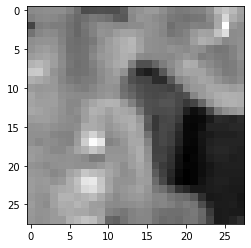

In [60]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [61]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

5836.903401360544


In [62]:
Area_All, Diameter_All=PSDArea(df_size) 


In [63]:
df_size.shape

(150, 785)

In [64]:
# print(Area_All)
print(Diameter_All)

[1.1146147552512575, 1.538426233047422, 1.0817558911755898, 1.5517713700794433, 1.1410605429429852, 0.8825088046305847, 1.0804793276691753, 1.1102736081525164, 1.4090295371759576, 1.7759715299415204, 1.3713734492388465, 0.9355069280341154, 1.010823785571352, 1.1455754477735218, 1.401389685444793, 1.1451844263443154, 1.286827540673557, 1.6900246720688243, 1.591564426802095, 1.169612435549301, 1.160226278973822, 1.2665260681759665, 1.016378904131099, 1.5375618039908077, 1.2962936992123606, 1.194256595640949, 1.3394344475439088, 1.266671428128682, 1.240842184677054, 1.262770597988654, 1.0736511585316106, 0.8974473351377856, 1.65037542964509, 1.6020603393961048, 1.656242595912655, 0.9261879751344708, 0.9243617843579981, 1.236754646608383, 1.587750173773158, 1.3979650698170176, 1.135666939846854, 1.73430089543582, 0.930320034684403, 1.4921106496831662, 1.1900999473279645, 1.14811825068445, 0.8507442354617034, 1.5822608447505258, 1.375177982744564, 1.7627706274734127, 1.7751891547496856, 1.0

In [65]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.66666667  2.         10.         22.         65.33333333]


In [66]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_fev_2020/marquesgabi_out_2020/Doutorado/marquesgabi_paper_fev_2021/Doutorado/Doutorado/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [67]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [68]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

[ 0.          0.          0.          0.          0.          0.
  0.          4.21052632 10.52631579 23.15789474 62.10526316]
[ 0.          0.          0.          0.          0.          0.
  0.66666667  2.         10.         22.         65.33333333]


In [69]:
np.sum(np.array(Perc_value))

100.0

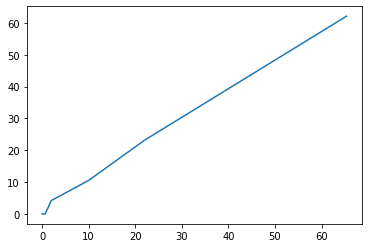

In [70]:
plt.plot( Perc_value,Perc_new )

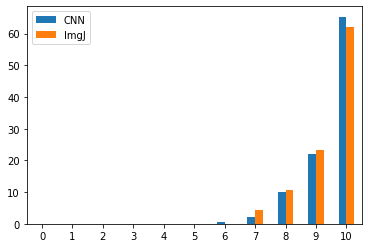

In [71]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [72]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ImgJ   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3412.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.37e-13
Time:                        15:09:47   Log-Likelihood:                -14.805
No. Observations:                  11   AIC:                             33.61
Df Residuals:                       9   BIC:                             34.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4057      0.344      1.180      0.2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


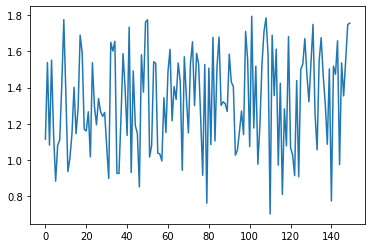

In [73]:
#plt.plot(Diam)
plt.plot(Diameter_All)

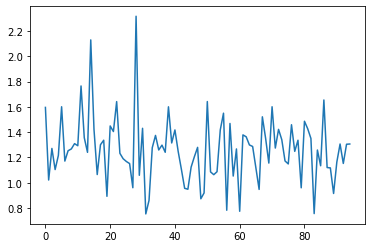

In [74]:
plt.plot(Diam1)

In [75]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

,0
count,95.000000
mean,1.260307
std,0.258410
min,0.753568
25%,1.117893
50%,1.267607
75%,1.376667
max,2.317439


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


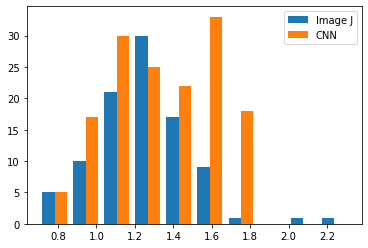

In [76]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

(array([ 4.,  6., 14., 17., 18., 21., 12., 27., 18., 13.]),
 array([0.7011617 , 0.81053353, 0.91990536, 1.02927718, 1.13864901,
        1.24802084, 1.35739266, 1.46676449, 1.57613632, 1.68550814,
        1.79487997]),
 <a list of 10 Patch objects>)

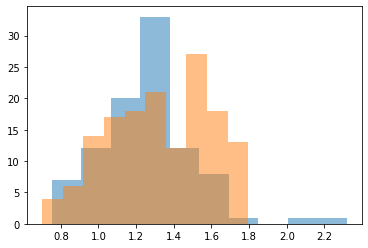

In [77]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)